In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/ml-project-2-satnet

/content/drive/MyDrive/ml-project-2-satnet


In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%cd utils

/content/drive/MyDrive/ml-project-2-satnet/utils


In [5]:
!pip install torch torchvision tqdm

In [16]:
!python data_normalization.py

We are in SatDataset Class
We accessed the images and masks
Mean: tensor([3.5042e-05, 2.7816e-04, 2.3398e-04])
Standard Deviation: tensor([1.0000, 0.9998, 1.0002])


In [17]:
!python unet_trainer.py

Device:  cuda
We are in SatDataset Class
We accessed the images and masks
  0% 0/10 [00:00<?, ?it/s]
  0% 0/20 [00:00<?, ?it/s]
  5% 1/20 [00:04<01:24,  4.45s/it]
 10% 2/20 [00:06<00:56,  3.12s/it]
 15% 3/20 [00:10<00:59,  3.51s/it]
 20% 4/20 [00:13<00:53,  3.36s/it]
 25% 5/20 [00:16<00:45,  3.05s/it]
 30% 6/20 [00:20<00:46,  3.31s/it]
 35% 7/20 [00:22<00:37,  2.88s/it]
 40% 8/20 [00:23<00:29,  2.43s/it]
 45% 9/20 [00:25<00:25,  2.36s/it]
 50% 10/20 [00:29<00:26,  2.66s/it]
 55% 11/20 [00:31<00:23,  2.60s/it]
 60% 12/20 [00:35<00:23,  2.96s/it]
 65% 13/20 [00:36<00:17,  2.56s/it]
 70% 14/20 [00:40<00:17,  2.85s/it]
 75% 15/20 [00:41<00:11,  2.30s/it]
 80% 16/20 [00:43<00:09,  2.35s/it]
 85% 17/20 [00:46<00:07,  2.54s/it]
 90% 18/20 [00:51<00:06,  3.00s/it]
 95% 19/20 [00:54<00:03,  3.03s/it]
100% 20/20 [00:58<00:00,  2.92s/it]

  0% 0/5 [00:00<?, ?it/s]
 20% 1/5 [00:03<00:12,  3.17s/it]
 40% 2/5 [00:06<00:10,  3.47s/it]
 60% 3/5 [00:10<00:06,  3.38s/it]
 80% 4/5 [00:13<00:03,  3.32s/it

In [18]:
!python unet_inference.py

Device:  cuda
Loading model
/content/drive/MyDrive/ml-project-2-satnet/utils/unet_inference.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

   train_loss  val_loss  train_accuracy  val_accuracy
0    0.526651  1.072601        0.751290      0.623654
1    0.390655  0.395899        0.829435      0.811473
2    0.358424  0.409298        0.843310      0.801726
3    0.332952  0.302151        0.853098      0.873663
4    0.324156  0.364299        0.855432      0.825724
5    0.302045  0.302932        0.865622      0.858512
6    0.288262  0.266858        0.873788      0.882365
7    0.270694  0.382931        0.885901      0.819194
8    0.267323  0.291750        0.887226      0.874293
9    0.266512  0.289106        0.889554      0.887705


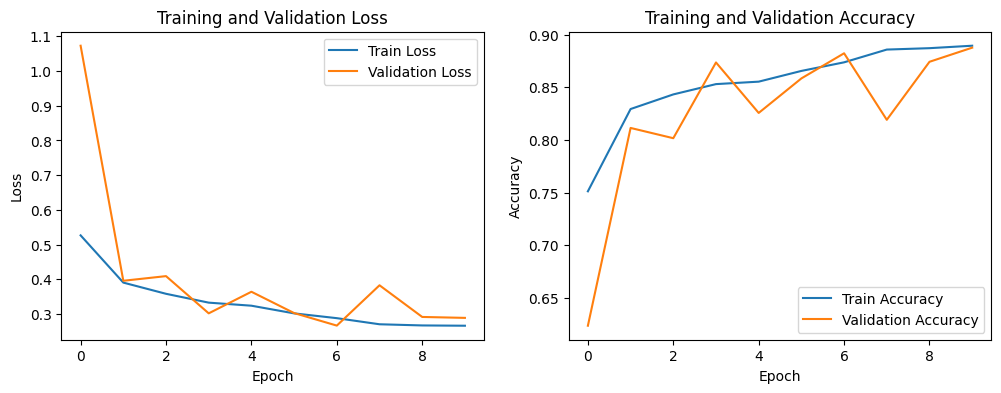

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = pd.read_json("../models/metrics.json")
print(metrics)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(metrics["train_loss"], label="Train Loss")
plt.plot(metrics["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(metrics["train_accuracy"], label="Train Accuracy")
plt.plot(metrics["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.show()

In [20]:
from helpers import *
from mask_to_submission import *

In [21]:
import os
from mask_to_submission import masks_to_submission

# Define the path to your images and the submission file
image_directory = '../dataset/mahmoud_testing/predicted/'  # Update this path
submission_filename = 'unet_test.csv'

# Collect all image filenames
image_filenames = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.png')]

# Sort the image filenames numerically
image_filenames.sort(key=lambda x: int(re.search(r'\d+', x).group()), reverse = True)

# Print the collected image filenames for verification
print("Collected image filenames:")
for filename in image_filenames:
    print(filename)

# Create the submission file
masks_to_submission(submission_filename, *image_filenames)
print(f"Submission file {submission_filename} created successfully.")

Collected image filenames:
../dataset/mahmoud_testing/predicted/predicted_satImage_015.png
../dataset/mahmoud_testing/predicted/predicted_satImage_014.png
../dataset/mahmoud_testing/predicted/predicted_satImage_013.png
../dataset/mahmoud_testing/predicted/predicted_satImage_012.png
../dataset/mahmoud_testing/predicted/predicted_satImage_011.png
Submission file unet_test.csv created successfully.
